In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\giftt\Downloads\airlines_flights_data.csv"
)


In [3]:
print(df.head())  # Display the first few rows of the DataFrame
print(df.columns)  # Display the column names to understand the structure of the DataFrame
print(df.info())  # Get a concise summary of the DataFrame, including data types and non-null counts
print(df.describe())  # Get a statistical summary of the DataFrame, useful for numerical columns
print(df['airline'].unique())  # Display unique airline names to understand the dataset better
print(df['airline'].value_counts())  # Count the occurrences of each airline in the dataset


   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  
Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
    

In [4]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [5]:
df = df.drop_duplicates()

In [6]:
# Drop rows with missing values in the 'price' column
df = df.dropna(subset=['price'])

In [8]:
# Ensure df is defined before proceeding
if 'df' in globals():
	# Fill missing values in 'duration' column with its median value
	df['duration'] = df['duration'].fillna(df['duration'].median())
	df['days_left'] = df['days_left'].fillna(df['days_left'].median())

	# Drop remaining rows with missing values (if any)
	df = df.dropna()
else:
	print("DataFrame 'df' is not defined. Please run the previous cells first.")

In [9]:
df = df.drop_duplicates()

In [11]:
cat_cols = ['airline', 'flight', 'source_city', 'departure_time',
            'stops', 'arrival_time', 'destination_city', 'class']

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

In [13]:
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['days_left'] = pd.to_numeric(df['days_left'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [14]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
                index  airline  flight source_city departure_time   stops  \
count   300153.000000   300153  300153      300153         300153  30015

In [16]:
airline_counts = df['airline'].value_counts()
print(airline_counts)

airline
Vistara      127859
Air_India     80892
Indigo        43120
Go_First      23173
Airasia       16098
Spicejet       9011
Name: count, dtype: int64


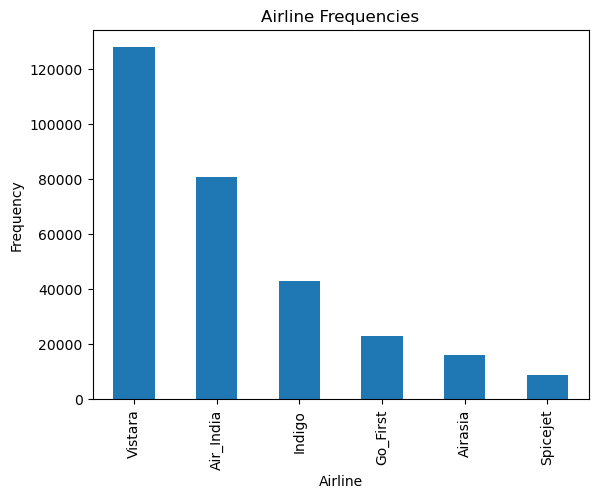

In [17]:
airline_counts.plot(kind='bar', title='Airline Frequencies')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.show()


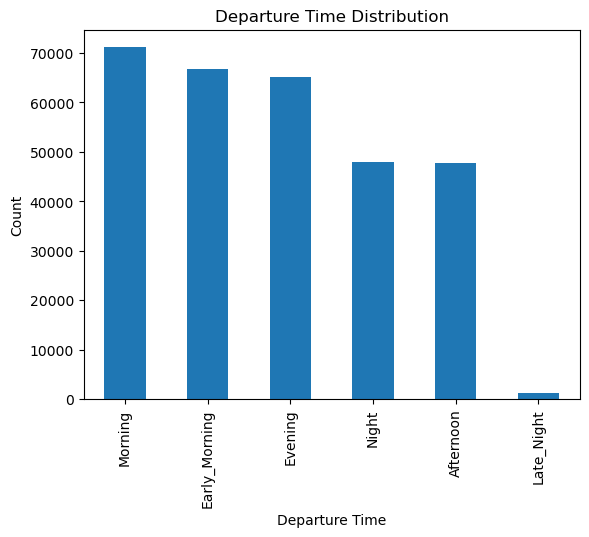

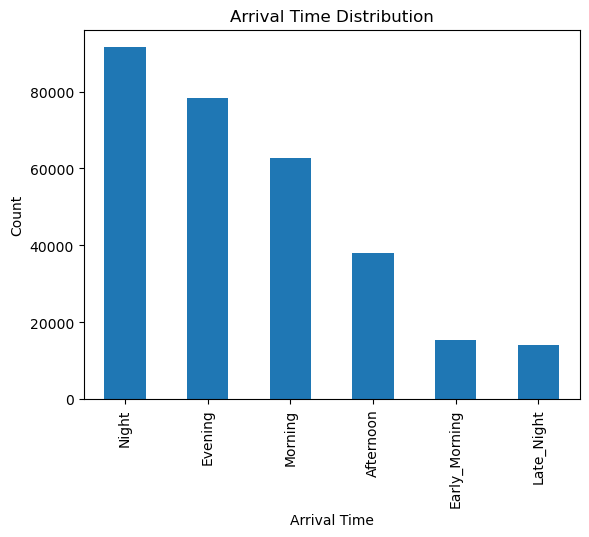

In [19]:
departure_counts = df['departure_time'].value_counts()
arrival_counts = df['arrival_time'].value_counts()

# Departure Time
departure_counts.plot(kind='bar', title='Departure Time Distribution')
plt.xlabel('Departure Time')
plt.ylabel('Count')
plt.show()

# Arrival Time
arrival_counts.plot(kind='bar', title='Arrival Time Distribution')
plt.xlabel('Arrival Time')
plt.ylabel('Count')
plt.show()

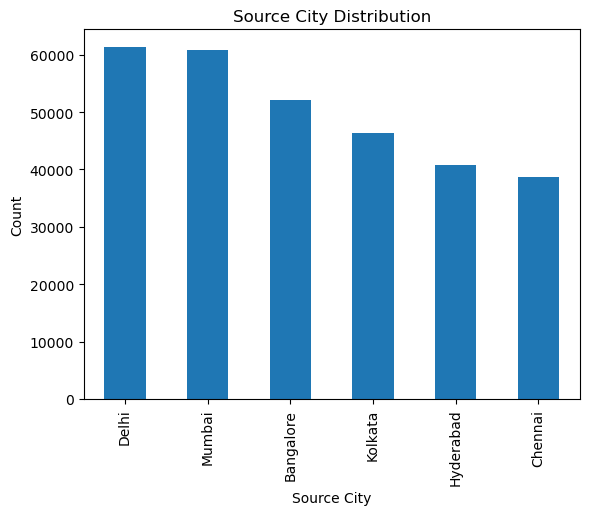

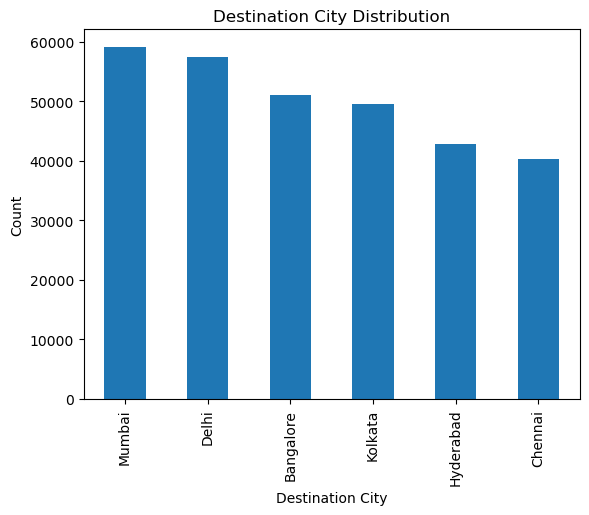

In [21]:
source_counts = df['source_city'].value_counts()
destination_counts = df['destination_city'].value_counts()

# Source City
source_counts.plot(kind='bar', title='Source City Distribution')
plt.xlabel('Source City')
plt.ylabel('Count')
plt.show()

# Destination City
destination_counts.plot(kind='bar', title='Destination City Distribution')
plt.xlabel('Destination City')
plt.ylabel('Count')
plt.show()

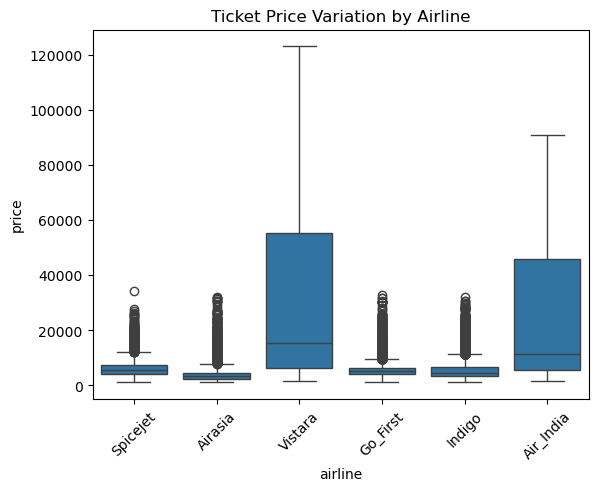

In [23]:
import seaborn as sns

sns.boxplot(x='airline', y='price', data=df)
plt.title('Ticket Price Variation by Airline')
plt.xticks(rotation=45)
plt.show()

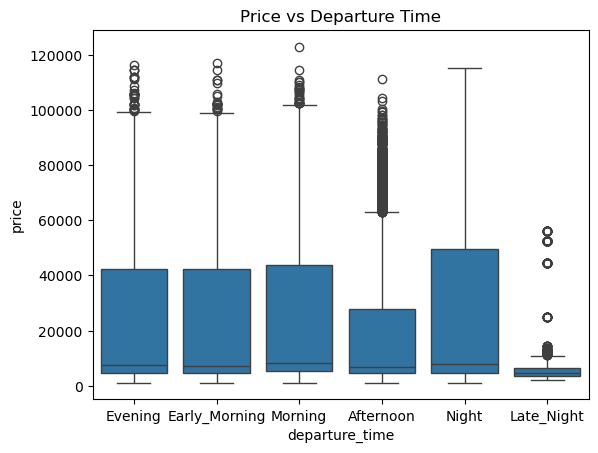

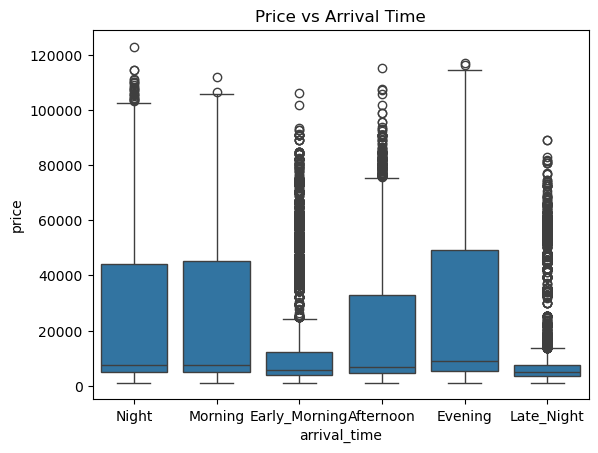

In [25]:
sns.boxplot(x='departure_time', y='price', data=df)
plt.title('Price vs Departure Time')
plt.show()

sns.boxplot(x='arrival_time', y='price', data=df)
plt.title('Price vs Arrival Time')
plt.show()

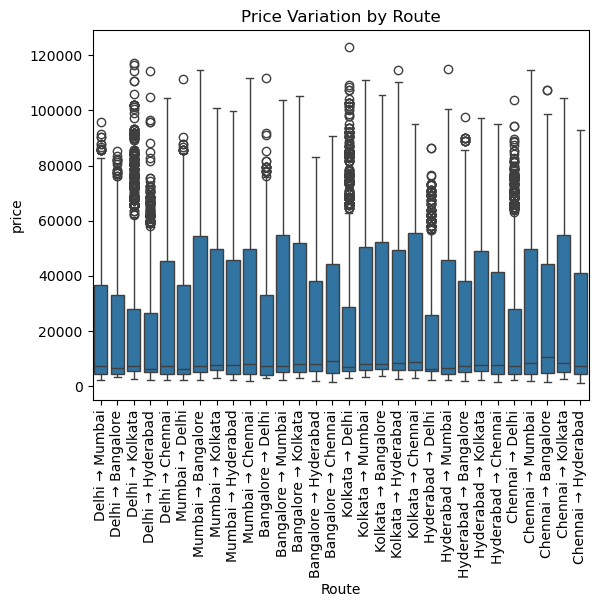

In [28]:
# Combine Source and Destination
df['Route'] = df['source_city'] + ' → ' + df['destination_city']
sns.boxplot(x='Route', y='price', data=df)
plt.title('Price Variation by Route')
plt.xticks(rotation=90)
plt.show()

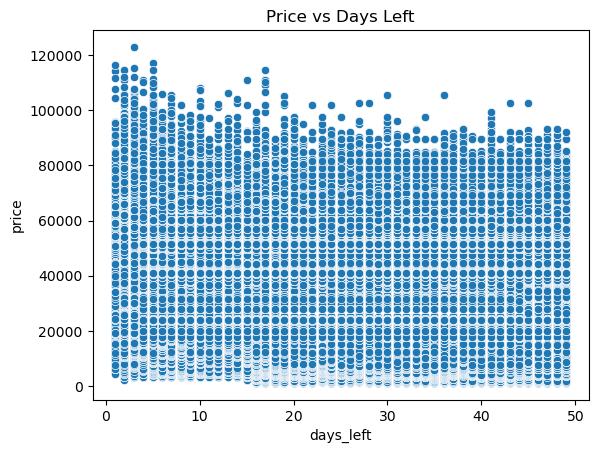

In [30]:
sns.scatterplot(x='days_left', y='price', data=df)
plt.title('Price vs Days Left')
plt.show()

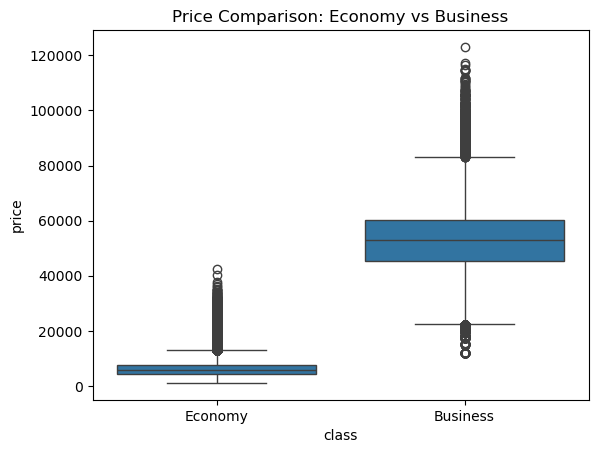

In [32]:
sns.boxplot(x='class', y='price', data=df)
plt.title('Price Comparison: Economy vs Business')
plt.show()

In [34]:
vistara_price = df[
    (df['airline'] == 'Vistara') &
    (df['source_city'] == 'Delhi') &
    (df['destination_city'] == 'Hyderabad') &
    (df['class'] == 'Business')
]['price'].mean()

print(f"Average Price: ₹{vistara_price:.2f}")

Average Price: ₹47939.84
